In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, AveragePooling2D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.15.0'

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [8]:
X_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [9]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [10]:
32*32

1024

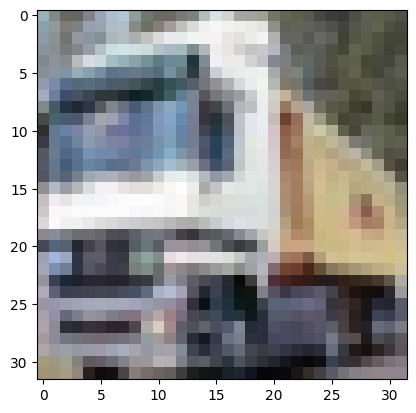

In [12]:
plt.imshow(X_train[1])

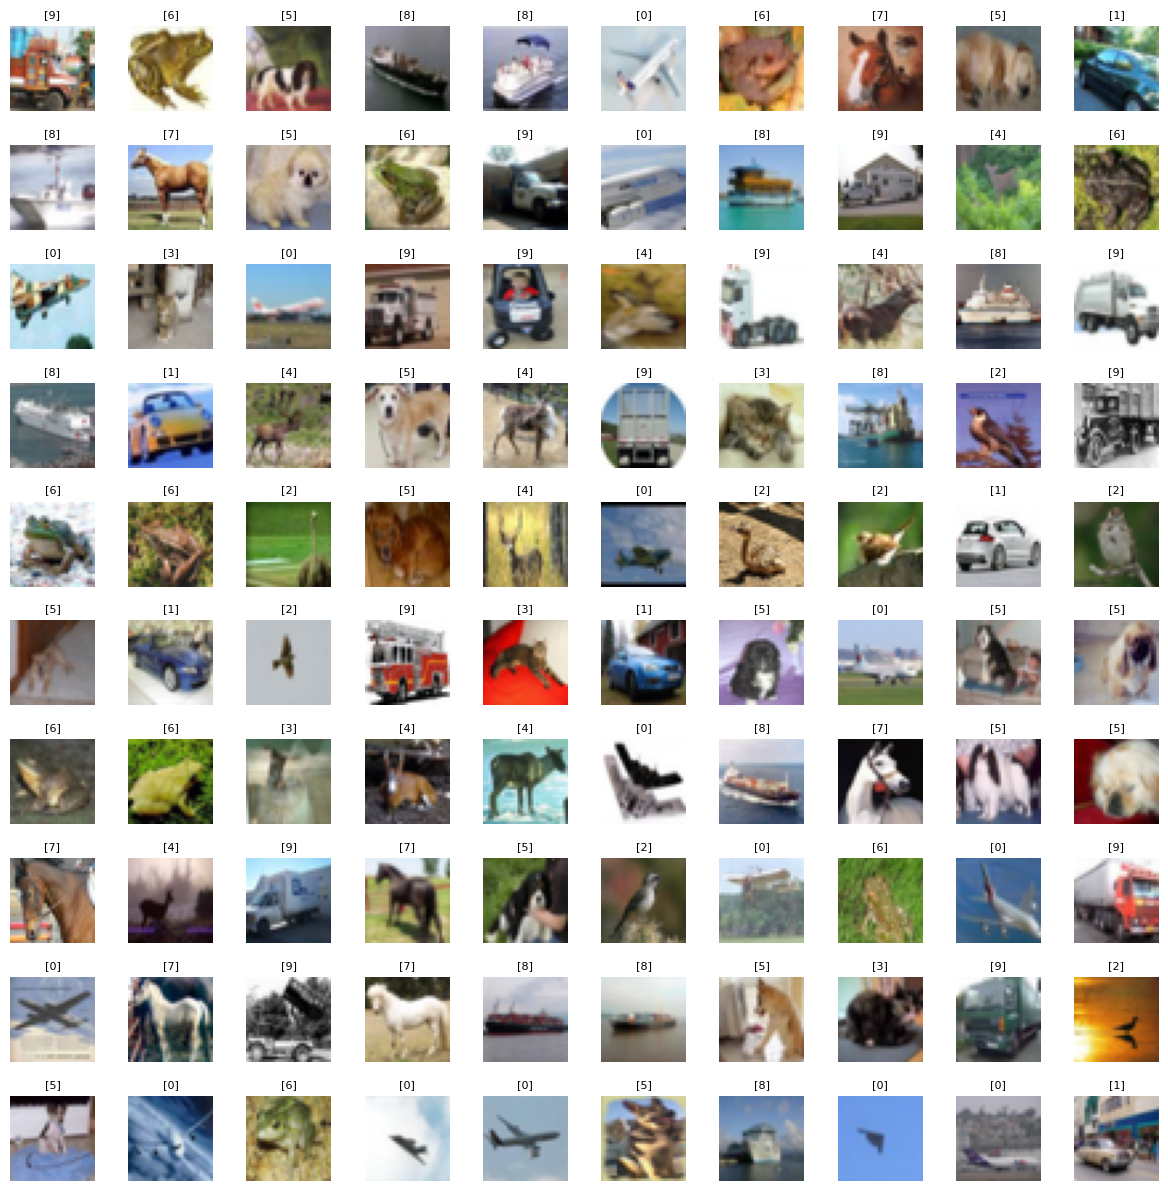

In [13]:
width = 10
height = 10

fig, axes = plt.subplots(height, width, figsize = (15,15))
axes = axes.ravel()
for i in np.arange(0, width * height):
    index = np.random.randint(0, 50000)
    axes[i].imshow(X_train[index], cmap = 'gray' )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4);

# Preprocessing the Images

In [14]:
X_train=X_train/255
X_test = X_test / 255

In [15]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

### Building and training the convolutional autoencoder


In [16]:
# BatchNormalization: https://keras.io/api/layers/normalization_layers/batch_normalization/

autoencoder = tf.keras.models.Sequential()

# Encoder
autoencoder.add(Conv2D(64, (3,3), activation = 'relu', padding='same', input_shape=(32, 32, 3)))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding="same"))

autoencoder.add(Conv2D(32, (3,3), activation = 'relu', padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding="same"))

autoencoder.add(Conv2D(16, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding="same")) # Encoded image

# Decoder
autoencoder.add(Conv2D(16, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(32, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(64, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(3, (3,3), activation='sigmoid', padding="same"))

In [17]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 average_pooling2d (Average  (None, 16, 16, 64)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                        

In [18]:
autoencoder.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
autoencoder.fit(X_train, X_train, epochs = 50)

Epoch 1/50
  24/1563 [..............................] - ETA: 9:00 - loss: 0.6719 - accuracy: 0.4064

KeyboardInterrupt: 

In [ ]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('average_pooling2d_2').output)
encoder.summary()

In [ ]:
coded_test_images = encoder.predict(X_test)

In [ ]:
coded_test_images.shape

In [ ]:
coded_test_images[0]

In [ ]:
decoded_test_images = autoencoder.predict(X_test)
decoded_test_images.shape

In [ ]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0], size = n_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):

  # Original image
  ax = plt.subplot(10,10,i + 1)
  plt.imshow(X_test[image_index].reshape(32,32,3))
  plt.xticks(())
  plt.yticks(())

  # Coded image
  ax = plt.subplot(10,10,i + 1 + n_images)
  plt.imshow(coded_test_images[image_index].reshape(16,16))
  plt.xticks(())
  plt.yticks(())

  # Decoded image
  ax = plt.subplot(10,10,i + 1 + n_images * 2)
  plt.imshow(decoded_test_images[image_index].reshape(32,32,3))
  plt.xticks(())
  plt.yticks(())